In [1]:
# Bilbiotecas para auxílio na programação matemática
import math, sys 
import numpy as np
import sympy as sp

from scipy import sparse # Produção das diagonais das matrizes
from scipy.sparse import diags 

# Plotagem 2D e 3D
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm


from os import path # Suficiente para manipulação de arquivos
    
# Para solução exata
from scipy.special import hermite
from math import factorial

%matplotlib inline
count = 0

# Para otimização dos sistemas
from scipy import optimize

import random

In [2]:
def somar(A, B):
    C = []
    nLinhasA, nLinhasB = len(A), len(B)
    nColA, nColB = len(A[0]), len(B[0])
    
    for i in range (nLinhasA):
        linha = [0]*nColA
        C.append(linha)
        for j in range(nColA):
            C[i][j] = A[i][j] + B[i][j]

    return C

def sub(A, B):
    C = []
    nLinhasA, nLinhasB = len(A), len(B)
    nColA, nColB = len(A[0]), len(B[0])
    
    for i in range (nLinhasA):
        linha = [0]*nColA
        C.append(linha)
        for j in range(nColA):
            C[i][j] = A[i][j] - B[i][j]

    return C

def dpsidt(t,psi, H):
    A = np.zeros((2,2), dtype=np.complex_)
    A = np.dot(complex(0,1),H)
    #print("A = ",A)
    #print("psi = ",psi)
    return (-1*np.matmul(A,psi))

def rungeKutta(psi0, h, H, t = 2, t0 = 0, p = 0):
    
    n = (int)((t-t0))
    S = np.zeros((2,int(t)), dtype=np.complex_)
    r = 0
    
    for i in range(1 + p, n + 1 + p):
        
        S[0][r] = psi0[0][0]
        S[1][r] = psi0[1][0]
        
        k1 = dpsidt(t0, psi0, H)
        k2 = dpsidt(t0 + 0.5 * h, somar(psi0, np.dot((0.5*h), k1)), H)
        k3 = dpsidt(t0 + 0.5 * h, somar(psi0, np.dot((0.5*h), k2)), H)
        k4 = dpsidt(t0 + h, somar(psi0, np.dot(h, k3)), H)
        
        A = somar(np.dot(2,k3), k4)
        B = somar(np.dot(2,k2), k1)
        C = somar(A, B)
 
        psi0 = somar(psi0,np.dot((h / 6.0),(C)))
    
        t0 = t0 + h
        
        r = r + 1
        
    return S

def fo(x, D, H, i, psi0):
    
    H1 = np.zeros((2,2), dtype=np.complex_)
    #H2 = np.zeros((2,2), dtype=np.complex_)
    
    H1 = [[0, x[0]], [x[0], 0]]
    #H2 = [[0, x[1]], [x[1], 0]]
    
    M = np.zeros((2,1),dtype=np.complex_)
    N = np.zeros((2,1),dtype=np.complex_)
    O = np.zeros((2,1),dtype=np.complex_)
    P = np.zeros((2,1),dtype=np.complex_)
    
    Result1 = np.zeros((2,1),dtype=np.complex_)
    Result2 = np.zeros((2,1),dtype=np.complex_)
    Result3 = np.zeros((2,1),dtype=np.complex_)
    Result4 = np.zeros((2,1),dtype=np.complex_)
    
    M = psi0
    
    Result2 = rungeKutta(M, h, somar(H,H1), t = 2, t0 = 0, p = 0)
    N = [[Result2[0][1]],[Result2[1][1]]]
    
    H1 = [[0, x[1]], [x[1], 0]]
    Result3 = rungeKutta(M, h, somar(H,H1), t = 3, t0 = 0, p = 0)
    O = [[Result3[0][2]],[Result3[1][2]]]
    
    H1 = [[0, x[2]], [x[2], 0]]
    Result4 = rungeKutta(M, h, somar(H,H1), t = 4, t0 = 0, p = 0)
    P = [[Result4[0][3]],[Result4[1][3]]]
    
    
    Z = np.zeros((2,1),dtype=np.complex_)
    Y = np.zeros((2,1),dtype=np.complex_)
    W = np.zeros((2,1),dtype=np.complex_)
    X = np.zeros((2,1),dtype=np.complex_)
    
    Z[0][0] = D[0][0]*np.exp(-1*complex(0,1)*(1/2*np.pi)*i/100)
    Z[1][0] = D[1][0]*np.exp(-1*complex(0,1)*(3/2*np.pi)*i/100)
    
    Y[0][0] = D[0][0]*np.exp(-1*complex(0,1)*(1/2*np.pi)*(i+1)/100)
    Y[1][0] = D[1][0]*np.exp(-1*complex(0,1)*(3/2*np.pi)*(i+1)/100)
    
    W[0][0] = D[0][0]*np.exp(-1*complex(0,1)*(1/2*np.pi)*(i+2)/100)
    W[1][0] = D[1][0]*np.exp(-1*complex(0,1)*(3/2*np.pi)*(i+2)/100)
    
    X[0][0] = D[0][0]*np.exp(-1*complex(0,1)*(1/2*np.pi)*(i+3)/100)
    X[1][0] = D[1][0]*np.exp(-1*complex(0,1)*(3/2*np.pi)*(i+3)/100)

    return (np.linalg.norm(Z-M)**2+np.linalg.norm(Y-N)**2+np.linalg.norm(W-O)**2+np.linalg.norm(X-P)**2)

def foS(x, alpha, d, D, H, i, psi0):
    
    z = x + alpha * d
    
    H1 = np.zeros((2,2), dtype=np.complex_)
    #H2 = np.zeros((2,2), dtype=np.complex_)
    
    H1 = [[0, z[0]], [z[0], 0]]
    #H2 = [[0, z[1]], [z[1], 0]]
    
    M = np.zeros((2,1),dtype=np.complex_)
    N = np.zeros((2,1),dtype=np.complex_)
    O = np.zeros((2,1),dtype=np.complex_)
    P = np.zeros((2,1),dtype=np.complex_)
    
    Result1 = np.zeros((2,1),dtype=np.complex_)
    Result2 = np.zeros((2,1),dtype=np.complex_)
    Result3 = np.zeros((2,1),dtype=np.complex_)
    Result4 = np.zeros((2,1),dtype=np.complex_)
    
    M = psi0
    
    Result2 = rungeKutta(M, h, somar(H,H1), t = 2, t0 = 0, p = 0)
    N = [[Result2[0][1]],[Result2[1][1]]]
    
    H1 = [[0, z[1]], [z[1], 0]]
    Result3 = rungeKutta(M, h, somar(H,H1), t = 3, t0 = 0, p = 0)
    O = [[Result3[0][2]],[Result3[1][2]]]
    
    H1 = [[0, x[2]], [x[2], 0]]
    Result4 = rungeKutta(M, h, somar(H,H1), t = 4, t0 = 0, p = 0)
    P = [[Result4[0][3]],[Result4[1][3]]]
    
    
    Z = np.zeros((2,1),dtype=np.complex_)
    Y = np.zeros((2,1),dtype=np.complex_)
    W = np.zeros((2,1),dtype=np.complex_)
    X = np.zeros((2,1),dtype=np.complex_)
    
    Z[0][0] = D[0][0]*np.exp(-1*complex(0,1)*(1/2*np.pi)*i/100)
    Z[1][0] = D[1][0]*np.exp(-1*complex(0,1)*(3/2*np.pi)*i/100)
    
    Y[0][0] = D[0][0]*np.exp(-1*complex(0,1)*(1/2*np.pi)*(i+1)/100)
    Y[1][0] = D[1][0]*np.exp(-1*complex(0,1)*(3/2*np.pi)*(i+1)/100)
    
    W[0][0] = D[0][0]*np.exp(-1*complex(0,1)*(1/2*np.pi)*(i+2)/100)
    W[1][0] = D[1][0]*np.exp(-1*complex(0,1)*(3/2*np.pi)*(i+2)/100)
    
    X[0][0] = D[0][0]*np.exp(-1*complex(0,1)*(1/2*np.pi)*(i+3)/100)
    X[1][0] = D[1][0]*np.exp(-1*complex(0,1)*(3/2*np.pi)*(i+3)/100)

    return (np.linalg.norm(Z-M)**2+np.linalg.norm(Y-N)**2+np.linalg.norm(W-O)**2+np.linalg.norm(X-P)**2)

In [3]:
def SecaoAurea(d, x, D, H, i, psi0):
    eps = 0.00000001
    a = 0
    b = 1
    xa = b - 0.618*(b-a)
    xb = a + 0.618*(b-a)
    fxa = foS(x, xa, d, D, H, i, psi0)
    fxb = foS(x, xb, d, D, H, i, psi0)
    
    while(b - a > eps):
        if(fxa < fxb):
            b = xb
            xb = xa
            xa = b - 0.618*(b - a)
            fxb = fxa
            fxa = foS(x, xa, d, D, H, i, psi0)
        else:
            a = xa
            xa = xb
            xb = a + 0.618*(b - a)
            fxa = fxb
            fxb = foS(x, xb, d, D, H, i, psi0)
            
    xp = (a+b)/2
    return xp

#Avaliação do gradiente
def gradiente(x, D, H, i, psi0):
    h = 0.0000001
    grad = []
    
    for i in range(len(x)):
        xh = x.copy()
        xh[i] = xh[i] + h
        dx = (fo(xh, D, H, i, psi0)-fo(x, D, H, i, psi0))/h
        grad.append(dx)
    return grad

In [4]:
def MetodoGrad(x, D, H, i, psi0):
    
    eps = 0.0000000001
    errox = eps + 1
    xant = x.copy()
    
    k = 0
    kmax = 100
    normagrad = eps + 1
    
    CP = ''
    
    while(CP == ''):
        d = -1*np.array(gradiente(x, D, H, i, psi0))
        alpha = SecaoAurea(d, x, D, H, i, psi0)
        x = x + alpha * d
        
        errox = np.linalg.norm(xant - x)
        xant = x.copy()
        if(errox <= eps):
            CP = CP + 'Erro x'
        normagrad = np.linalg.norm(d)
        if(normagrad <= eps):
            CP = CP + 'Norma Gradiente'
        if(k >= kmax):
            CP = 'Numero de iteracoes'
            
        k += 1
        
    xOtimo = x
    return k, xOtimo, CP

In [5]:
x = []
x.append(random.uniform(-5., 5.))
x.append(x[0])
x.append(x[0])

i = 0

psi0 = [[complex(1.0,0.0)],[complex(0.0,0.0)]]
h = 0.01

E = np.zeros((2,2))
I = np.zeros((2,2))
R = np.zeros((2,2), dtype=np.complex_)
H = E.astype(complex)

A = (1/2*np.pi)
B = (3/2*np.pi)

I = [[1, 0], [0, 1]]
H = [[A, 0], [0, B]]
R = H

Resp = np.zeros((2,1000), dtype=np.complex_)

D = np.zeros((2,1), dtype=np.complex_)
D = [[complex(1/np.sqrt(2),0)],[complex(1/np.sqrt(2),0)]]

while i < 1000:
    
    print("iteracao: ", i+1)
    
    Resp[0][i] = psi0[0][0]
    Resp[1][i] = psi0[1][0]
    
    resultado = MetodoGrad(x, D, H, i, psi0)
    
    x = []
    u = np.zeros((2,2))
    x.append(random.uniform(-5., 5.))
    x.append(x[0])
    x.append(x[0])
    
    u = [[0, resultado[1][0]],[resultado[1][0], 0]]
        
    i = i + 1
    H = somar(H, u)
    
    psi_t = np.zeros((2,2), dtype=np.complex_)
    
    psi_t = rungeKutta(psi0, h, H, t = 2, t0 = 0, p = 0)
    
    psi0[0][0] = psi_t[0][1]
    psi0[1][0] = psi_t[1][1]
    
    H = [[A, 0], [0, B]]
    
    print(psi0)

iteracao:  1
[[(0.9988727466039138-0.015681021498653944j)], [(-0.0014073075801473065-0.04478124630699853j)]]
iteracao:  2
[[(0.9995042349123658-0.031452518313672295j)], [(-0.0014149409676317308-0.00013856303574946022j)]]
iteracao:  3
[[(0.9985948566121917-0.04716562701932199j)], [(0.00010606522362751475+0.024159932648938537j)]]
iteracao:  4
[[(0.9978044950664999-0.06280939277089209j)], [(-0.00230037127837391-0.020877609238679554j)]]
iteracao:  5
[[(0.9967371042701665-0.07848060376561736j)], [(-0.003079601739257157-0.018613229879364566j)]]
iteracao:  6
[[(0.9954828771175604-0.09414912587420375j)], [(-0.0032196312670776384-0.011807366327539221j)]]
iteracao:  7
[[(0.9939296826738804-0.10979138295463979j)], [(-0.003100367593408015-0.00632631858796281j)]]
iteracao:  8
[[(0.9910356151305577-0.12514828953006338j)], [(-0.00904575362362144-0.04587466861381845j)]]
iteracao:  9
[[(0.9899822181214185-0.14099939940627662j)], [(-0.004880936420458538-0.005527074968578703j)]]
iteracao:  10
[[(0.987649

[[(0.29555163551863417-0.9249675550010111j)], [(0.1281474514666832+0.20164931636735658j)]]
iteracao:  80
[[(0.28176500884622385-0.9300197694137474j)], [(0.13381231045027359+0.1943346006939158j)]]
iteracao:  81
[[(0.2598177441086648-0.9284298437580326j)], [(0.17789576585141367+0.19714417016033958j)]]
iteracao:  82
[[(0.2371132192942271-0.9240202091821084j)], [(0.2254026975838899+0.19788269057129876j)]]
iteracao:  83
[[(0.21724175591068007-0.9209079652489094j)], [(0.2600051322646992+0.19269621406281862j)]]
iteracao:  84
[[(0.2018519687540225-0.9229042123554464j)], [(0.2732939607828989+0.18114626462600758j)]]
iteracao:  85
[[(0.18690352836768914-0.9252682802854076j)], [(0.2838204193302389+0.168498103235259j)]]
iteracao:  86
[[(0.17576975556474916-0.9341414832553141j)], [(0.27117916333863584+0.15148103578117988j)]]
iteracao:  87
[[(0.15786104668246465-0.9304233143840271j)], [(0.29882639267482203+0.14175716340963093j)]]
iteracao:  88
[[(0.1408072649725767-0.9271404209780931j)], [(0.32206773

[[(-0.3892130467333032-0.6697329000705243j)], [(-0.3625845491740483-0.5181731673553366j)]]
iteracao:  158
[[(-0.40769477050817043-0.6574264502199926j)], [(-0.39700217936685867-0.4939277738895363j)]]
iteracao:  159
[[(-0.4122571898827706-0.6557667456516054j)], [(-0.4121893315432124-0.47970186491999484j)]]
iteracao:  160
[[(-0.43178562706195067-0.6405072259627236j)], [(-0.44714048317838645-0.450973384166834j)]]
iteracao:  161
[[(-0.4221513448360716-0.6533172847274312j)], [(-0.439878313770663-0.44885607462991434j)]]
iteracao:  162
[[(-0.4140894155373911-0.6647408118398562j)], [(-0.43381244190095364-0.4454843581496105j)]]
iteracao:  163
[[(-0.40010575335569537-0.6817652810776869j)], [(-0.41783624098491556-0.4477993997064405j)]]
iteracao:  164
[[(-0.4023518032934226-0.6835564730363761j)], [(-0.42555251971526287-0.43562434103879716j)]]
iteracao:  165
[[(-0.3892565690565432-0.7002208230203142j)], [(-0.4081537198876724-0.4376992144011735j)]]
iteracao:  166
[[(-0.3775614974201104-0.715025710222

[[(-0.7068380864724362-0.1673449612435071j)], [(0.18435559869353735+0.6621091379663163j)]]
iteracao:  235
[[(-0.7113518662017502-0.15560352164303468j)], [(0.21577648611304395+0.650543225583226j)]]
iteracao:  236
[[(-0.7291701508203136-0.13861881892828914j)], [(0.24935496070672683+0.6220271144411915j)]]
iteracao:  237
[[(-0.7542906857860119-0.11673941510465288j)], [(0.2826198820568132+0.5809848400611943j)]]
iteracao:  238
[[(-0.7392339476444473-0.1135053744187465j)], [(0.306867650601537+0.5886270952402168j)]]
iteracao:  239
[[(-0.7287504089673862-0.10861180557611382j)], [(0.332310964100393+0.5888086716003514j)]]
iteracao:  240
[[(-0.7224029017340343-0.10193239205274705j)], [(0.35847570952615204+0.582442196372213j)]]
iteracao:  241
[[(-0.7340050878223816-0.08382705823562257j)], [(0.38686959472442345+0.5518526824907884j)]]
iteracao:  242
[[(-0.7423634606446887-0.06689085771118375j)], [(0.4132100585622504+0.5231438271703516j)]]
iteracao:  243
[[(-0.7215991981774381-0.07294074369468449j)], 

[[(-0.1559901830304687+0.5941734503346188j)], [(-0.7260822540659972-0.308916480553138j)]]
iteracao:  313
[[(-0.15488242718658649+0.6176532936505434j)], [(-0.7221301744545644-0.2702660007320453j)]]
iteracao:  314
[[(-0.13821932388212366+0.5994397435600927j)], [(-0.7510976005399812-0.2396240048330192j)]]
iteracao:  315
[[(-0.13377066858423253+0.6189931953595774j)], [(-0.7473237145109052-0.2011465997951712j)]]
iteracao:  316
[[(-0.1180165185289877+0.5954329831360596j)], [(-0.7764136900460463-0.16944999736739053j)]]
iteracao:  317
[[(-0.11383768381579708+0.6251451112677251j)], [(-0.761310835302894-0.12899704818817964j)]]
iteracao:  318
[[(-0.1093001757815202+0.6655416148551271j)], [(-0.7330518854177648-0.08799213409494344j)]]
iteracao:  319
[[(-0.10123576485586197+0.694666451132225j)], [(-0.7104180633650875-0.049958659382643024j)]]
iteracao:  320
[[(-0.09035495781726242+0.697281324733124j)], [(-0.7108927072196588-0.01631396141122076j)]]
iteracao:  321
[[(-0.07920370186276672+0.717451407270

[[(0.6610045001239356+0.2344769840380038j)], [(0.637163834623844-0.3195553773355611j)]]
iteracao:  391
[[(0.6671302877637086+0.22875576300465963j)], [(0.6197854450354544-0.3442002014228798j)]]
iteracao:  392
[[(0.6589904577053793+0.19918438412917538j)], [(0.6090589301697009-0.3938326712013112j)]]
iteracao:  393
[[(0.6504101004023849+0.17230391715636623j)], [(0.5945211893986847-0.4402526679507958j)]]
iteracao:  394
[[(0.6589432982823737+0.16959738496136684j)], [(0.5711006717057522-0.45921049008503934j)]]
iteracao:  395
[[(0.6543756563491293+0.15095289752645388j)], [(0.5509822485257626-0.4954029465531277j)]]
iteracao:  396
[[(0.6817635528933585+0.16757389820115395j)], [(0.5197541667356229-0.4867985682709202j)]]
iteracao:  397
[[(0.6618316714011261+0.13481287645650572j)], [(0.5021148974589362-0.5400784645247696j)]]
iteracao:  398
[[(0.6641420740147446+0.1246402819489186j)], [(0.47605992892942434-0.5628026658136005j)]]
iteracao:  399
[[(0.6720378352373926+0.11899219111268707j)], [(0.447906

[[(0.35462172027675126-0.7167565014039035j)], [(-0.12252531212752477+0.5877846776479856j)]]
iteracao:  469
[[(0.33921136704711785-0.7229419066910128j)], [(-0.0896538446795776+0.5951911980484176j)]]
iteracao:  470
[[(0.30146422261352657-0.7305760066281883j)], [(-0.029501267273590828+0.6119701133371618j)]]
iteracao:  471
[[(0.29007391375082114-0.7352190079775144j)], [(-0.000788422795326954+0.6126248742651685j)]]
iteracao:  472
[[(0.2862379301674793-0.7398589758559805j)], [(0.01862927786481092+0.6085468071254919j)]]
iteracao:  473
[[(0.28514736622656306-0.7448085632319464j)], [(0.034204207497678364+0.6023130241876117j)]]
iteracao:  474
[[(0.25880868590363854-0.7476920299156063j)], [(0.08073500310668441+0.6061817173867583j)]]
iteracao:  475
[[(0.26570466646501356-0.7544049522757754j)], [(0.08562585930285539+0.5940893308844847j)]]
iteracao:  476
[[(0.2682221818343004-0.7608096863673953j)], [(0.09481663940164275+0.583296673915176j)]]
iteracao:  477
[[(0.28347992736517996-0.7694302111147376j)

[[(-0.2830090762519888-0.5807039483990681j)], [(0.16210710900744527-0.7459287956001529j)]]
iteracao:  547
[[(-0.280077466303957-0.5739020661334934j)], [(0.13589323077788157-0.7574468673865449j)]]
iteracao:  548
[[(-0.255289274379138-0.5639568973648569j)], [(0.12479720422395123-0.7753743336935499j)]]
iteracao:  549
[[(-0.25501383513401243-0.5586688678441042j)], [(0.0946072064524745-0.7835216727217563j)]]
iteracao:  550
[[(-0.28056875325225383-0.5559686516053891j)], [(0.04576446063630671-0.7810796002577682j)]]
iteracao:  551
[[(-0.2666400905816271-0.5506557777470988j)], [(0.024648380236725116-0.7906158538550444j)]]
iteracao:  552
[[(-0.23587660991664755-0.5457470933111707j)], [(0.014132488293699673-0.8039417278011998j)]]
iteracao:  553
[[(-0.2699734230899119-0.5413441010228401j)], [(-0.040933399501707275-0.7952264234828245j)]]
iteracao:  554
[[(-0.2980813643709499-0.535233777324452j)], [(-0.0915658561960611-0.7850399288111412j)]]
iteracao:  555
[[(-0.30644489598675095-0.5304866960771956j

[[(-0.6708174130583673-0.18468433956771452j)], [(0.0612957930113558+0.7156383014642844j)]]
iteracao:  625
[[(-0.6419050042617104-0.17761572962913194j)], [(0.08772936417340715+0.7407522091840789j)]]
iteracao:  626
[[(-0.6250000190588935-0.17037260939403084j)], [(0.11834936970641252+0.7525564664534391j)]]
iteracao:  627
[[(-0.6020639343059563-0.16522196414101428j)], [(0.1485175047629244+0.766917811902493j)]]
iteracao:  628
[[(-0.577743167041122-0.16165016946880215j)], [(0.17929123796392252+0.7797027414023904j)]]
iteracao:  629
[[(-0.5460481147388137-0.16126679243279735j)], [(0.20939390771712355+0.7949706445933578j)]]
iteracao:  630
[[(-0.5402445477967687-0.15511130858068975j)], [(0.24509065735927674+0.7899408436029182j)]]
iteracao:  631
[[(-0.5226372854792715-0.15339410869654005j)], [(0.2784451597580195+0.7910679263906425j)]]
iteracao:  632
[[(-0.5093810443863659-0.15114701876749423j)], [(0.31262671878409104+0.7873688594044636j)]]
iteracao:  633
[[(-0.4748915212632278-0.15870281610793735

[[(-0.301141416193903+0.31895433767144493j)], [(-0.4116225173806212-0.7988419620247835j)]]
iteracao:  702
[[(-0.30724408414942683+0.3298243889346744j)], [(-0.4440798539390072-0.7743446438951578j)]]
iteracao:  703
[[(-0.30319260607135584+0.3353284438604298j)], [(-0.47954173131593425-0.7521093039927841j)]]
iteracao:  704
[[(-0.28734409501053493+0.33283652797301233j)], [(-0.519306410490659-0.7327848711343508j)]]
iteracao:  705
[[(-0.29446115660682604+0.34666092184069475j)], [(-0.5472392361778953-0.7026006328611529j)]]
iteracao:  706
[[(-0.3145850345961892+0.37242875167847783j)], [(-0.5659208092305114-0.6648806779742407j)]]
iteracao:  707
[[(-0.32396188973086065+0.3911381948282314j)], [(-0.587376689240329-0.6301173132380549j)]]
iteracao:  708
[[(-0.34472649490421353+0.4228417621965464j)], [(-0.5979144887089151-0.5872532224365279j)]]
iteracao:  709
[[(-0.3567939828095908+0.44849739979527303j)], [(-0.6101233095426887-0.5470806867426841j)]]
iteracao:  710
[[(-0.3495067634095348+0.453810449670

[[(0.4653420585767632+0.6613605181004347j)], [(0.5462742240427515+0.218272885976827j)]]
iteracao:  780
[[(0.47277077259284866+0.6617525855626358j)], [(0.5467175884636245+0.19917514278020462j)]]
iteracao:  781
[[(0.4766362421378553+0.6726683910085627j)], [(0.5331808626293142+0.1898758620327425j)]]
iteracao:  782
[[(0.4910058293264765+0.6524836190706556j)], [(0.5565637506147048+0.1530187580612101j)]]
iteracao:  783
[[(0.5057243954675671+0.6241613835309913j)], [(0.5856232034044341+0.10821465634861699j)]]
iteracao:  784
[[(0.5186503061259303+0.5920006758746413j)], [(0.6140150571641548+0.05934738830471565j)]]
iteracao:  785
[[(0.5287228034273495+0.5681197066678522j)], [(0.630403077871926+0.016843340354025807j)]]
iteracao:  786
[[(0.5375175527438129+0.5733033134020015j)], [(0.618382334507689-0.001011083025091071j)]]
iteracao:  787
[[(0.5466082356286451+0.5699528189461184j)], [(0.6129628058838161-0.025482583451605784j)]]
iteracao:  788
[[(0.555216458554388+0.5576370094169512j)], [(0.614366847

[[(0.6700848059137261-0.20508111813694171j)], [(-0.6921212753298134+0.17290381082763717j)]]
iteracao:  859
[[(0.6642333812340757-0.2243571516614521j)], [(-0.6802556316336282+0.21379817319448152j)]]
iteracao:  860
[[(0.6712432406697226-0.20186173535657453j)], [(-0.6805157536976584+0.213499789186902j)]]
iteracao:  861
[[(0.6590224646036597-0.23669904385289267j)], [(-0.661164643145973+0.2693023692599282j)]]
iteracao:  862
[[(0.6593655478675665-0.2375191832444247j)], [(-0.6514129821807328+0.2906584526906256j)]]
iteracao:  863
[[(0.6643157325088065-0.22908129926529391j)], [(-0.6442291791682254+0.301951367125662j)]]
iteracao:  864
[[(0.6574232878824694-0.24574064644035565j)], [(-0.6267921583483381+0.3384335131692501j)]]
iteracao:  865
[[(0.6682723877173041-0.22931182878573048j)], [(-0.6210356467372018+0.3393262791643095j)]]
iteracao:  866
[[(0.6762083380944504-0.2192475046446054j)], [(-0.6123857311865636+0.34591332529564334j)]]
iteracao:  867
[[(0.6560356361721436-0.25597215889098945j)], [(-

[[(0.09294517489191187-0.8532556870661513j)], [(0.3995744950580742-0.3219559242874464j)]]
iteracao:  937
[[(0.10026601257301111-0.8286412583428662j)], [(0.4366309438846353-0.3356386097428915j)]]
iteracao:  938
[[(0.08019671470432554-0.8385138565826714j)], [(0.4035231104586343-0.3572556005284038j)]]
iteracao:  939
[[(0.0863633384735986-0.8179073301227695j)], [(0.4298752008562723-0.3725261730418651j)]]
iteracao:  940
[[(0.09068253873214313-0.7996669222703908j)], [(0.44808621242223-0.38926559217387546j)]]
iteracao:  941
[[(0.10116943745170698-0.7746252914527669j)], [(0.4746429373888025-0.4055045600302246j)]]
iteracao:  942
[[(0.08483331581336101-0.7806429719774073j)], [(0.4473094980989971-0.42815129926475054j)]]
iteracao:  943
[[(0.08912653920494704-0.7650291134828023j)], [(0.4557634642490362-0.44616817825940963j)]]
iteracao:  944
[[(0.07510792820339014-0.7682368735754473j)], [(0.43091715678884107-0.4674192681134848j)]]
iteracao:  945
[[(0.07279797361501805-0.7607009235432884j)], [(0.4240

In [6]:
len(Resp[0])

1000

/home/gabriel/miniconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


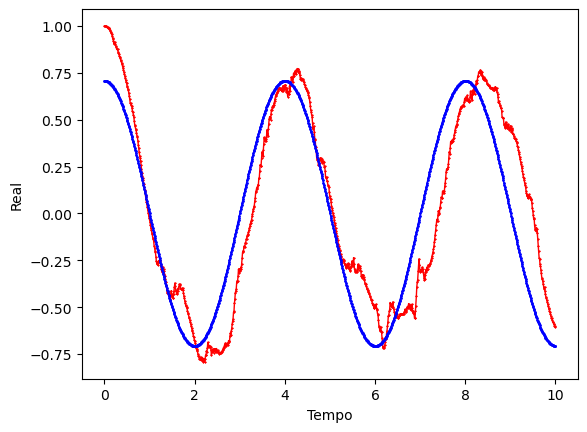

In [7]:
ts = np.linspace(0, 10, 1000)

x = [ele.real for ele in Resp[0]] 
y = [ele.imag for ele in Resp[0]] 

plt.ylabel('Real') 
plt.xlabel('Tempo') 
plt.plot(ts, x, color='r', marker='*', linewidth=1, markersize=1)

p = []

for i in range(0, 1000):
    p.append(1/np.sqrt(2)*np.exp(-1*complex(0,1)*(1/2*np.pi)*i/100))

plt.plot(ts, p, color='b', marker='o',  linewidth=1, markersize=1)
plt.show()

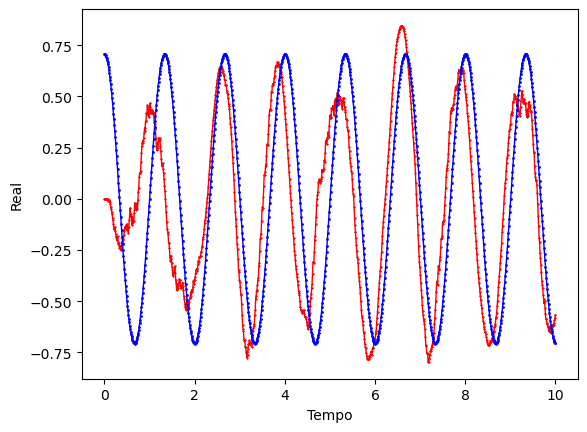

In [8]:
ts = np.linspace(0, 10, 1000)

x = [ele.real for ele in Resp[1]] 
y = [ele.imag for ele in Resp[1]] 

plt.ylabel('Real') 
plt.xlabel('Tempo') 
plt.plot(ts, x, color='r', marker='*', linewidth=1, markersize=1)

p = []

for i in range(0, 1000):
    p.append(1/np.sqrt(2)*np.exp(-3*complex(0,1)*(1/2*np.pi)*i/100))

plt.plot(ts, p, color='b', marker='o',  linewidth=1, markersize=1)
plt.show()